# Step 3: Detect blobs

Should show the detected blobs before moving on...

In [9]:
import os
import zarr
import numpy as np
from phathom import io
from phathom.registration.registration import detect_blobs_parallel

In [3]:
working_dir = '/home/jswaney/coregistration/'

In [4]:
# Open images
fixed_zarr_path = 'fixed/zarr_stack/1_1_1'
moving_zarr_path =  'moving/zarr_stack/1_1_1'

fixed_img = io.zarr.open(os.path.join(working_dir,
                                      fixed_zarr_path), 
                         nested=True, 
                         mode='r')
moving_img = io.zarr.open(os.path.join(working_dir,
                                       moving_zarr_path), 
                          nested=True, 
                          mode='r')

print('Opened fixed image:', fixed_img.shape)
print('Opened moving image:', moving_img.shape)

Opened fixed image: (4506, 12374, 7337)
Opened moving image: (4058, 12385, 7310)


In [5]:
moving_slice = moving_img[1000]

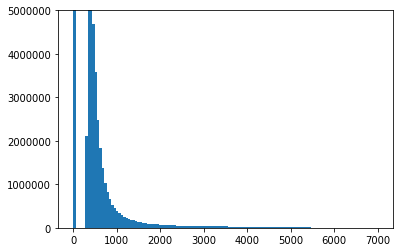

In [6]:
import matplotlib.pyplot as plt

plt.hist(moving_slice.ravel(), bins=128)
plt.ylim([0, 5e6])
plt.show()

<IPython.core.display.Javascript object>


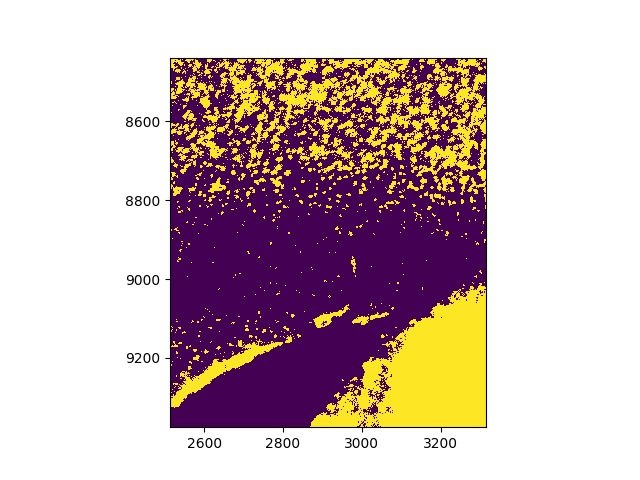

In [26]:
%matplotlib notebook
threshold = 500
plt.imshow(moving_slice > threshold)
plt.show()

In [18]:
fixed_slice = fixed_img[1000]

<IPython.core.display.Javascript object>


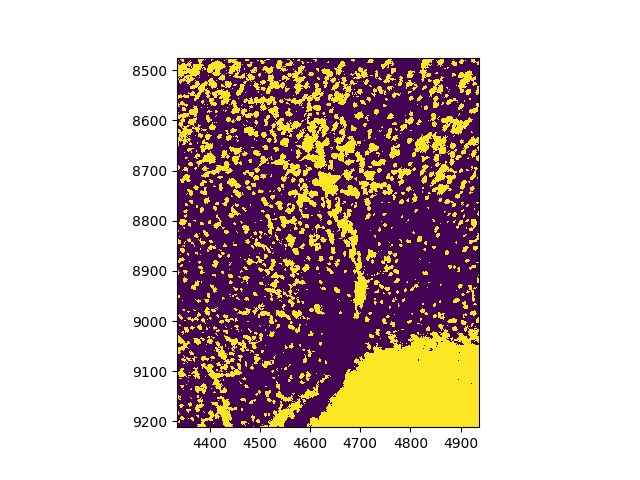

In [27]:
%matplotlib notebook
threshold = 700
plt.imshow(fixed_slice > threshold)
plt.show()

In [7]:
# Detect blobs
sigma = (1.2, 2.0, 2.0)
min_distance = 2  # 3 previously
min_intensity_fixed = 700
min_intensity_moving = 500
nb_workers = 8
overlap = 8


fixed_pts = detect_blobs_parallel(fixed_img, 
                                  sigma, 
                                  min_distance, 
                                  min_intensity_fixed, 
                                  nb_workers, 
                                  overlap)

moving_pts = detect_blobs_parallel(moving_img, 
                                   sigma, 
                                   min_distance, 
                                   min_intensity_moving, 
                                   nb_workers, 
                                   overlap)

print('found {} keypoints in fixed image'.format(len(fixed_pts)))
print('found {} keypoints in moving image'.format(len(moving_pts)))

100%|██████████| 1427840/1427840 [2:12:52<00:00, 179.09it/s] 


found 23637704 keypoints in fixed image
found 21672500 keypoints in moving image


In [10]:
# Save blobs
fixed_pts_path = 'fixed/blobs.npy'
moving_pts_path = 'moving/blobs.npy'

np.save(os.path.join(working_dir,fixed_pts_path), fixed_pts)
np.save(os.path.join(working_dir, moving_pts_path), moving_pts)